In [3]:
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv, matrix_rank
X = [-10, -8,-3,-1,2,8]
y = [5,5,4,3,2,2]

poly = PolynomialFeatures(degree=3)
P = poly.fit_transform([[x] for x in X])
print(P)
w = inv(P.T@P)@P.T@y #overdetermined fitting
pred_Y = P@w
print(pred_Y)

[[    1.   -10.   100. -1000.]
 [    1.    -8.    64.  -512.]
 [    1.    -3.     9.   -27.]
 [    1.    -1.     1.    -1.]
 [    1.     2.     4.     8.]
 [    1.     8.    64.   512.]]
[4.94770427 5.10404736 3.86481685 3.07716197 2.01152039 1.99474917]


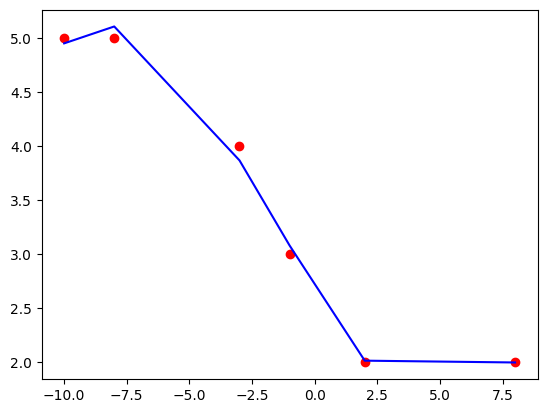

In [8]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'ro')
plt.plot(X, pred_Y, 'b-')
plt.show()

In [11]:
test_X = [[9]]
test_P = poly.fit_transform(test_X)
pred_Y = test_P@w
print(pred_Y)

[2.46609771]


In [14]:
import numpy as np
X = np.array([[1, -10],[1, -8],[1, -3],[1, -1],[1, 2],[1, 8]])
y = [5,5,4,3,2,2]
y = np.array([[y] for y in y])
w = inv(X.T @ X)@X.T@y 
pred_Y = X@w


In [15]:
pred_Y

array([[5.07798165],
       [4.68348624],
       [3.69724771],
       [3.30275229],
       [2.71100917],
       [1.52752294]])

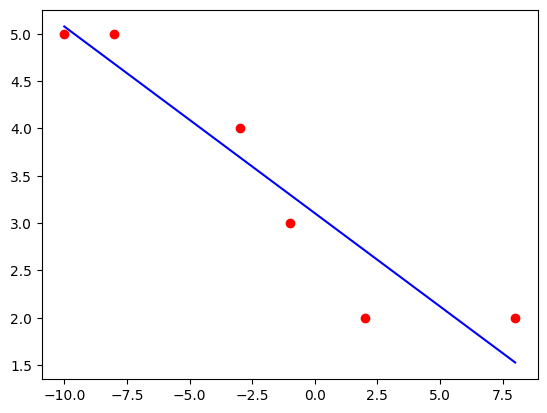

In [16]:
plt.plot(X[:,1], y, 'ro')
plt.plot(X[:,1], pred_Y, 'b-')
plt.show()

In [18]:
X = np.array([[1,0,1], [1,-1,1]])
poly = PolynomialFeatures(degree=3)
P = poly.fit_transform(X)
print(P)

[[ 1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.
   0.  1.]
 [ 1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1.
  -1.  1.]]


In [19]:
y = np.array([[0],[1]])
w = P.T@inv(P@P.T + 0.1*np.eye(P.shape[0]))@y
print(w)

[[ 0.00097078]
 [ 0.00097078]
 [-0.09804873]
 [ 0.00097078]
 [ 0.00097078]
 [-0.09804873]
 [ 0.00097078]
 [ 0.09804873]
 [-0.09804873]
 [ 0.00097078]
 [ 0.00097078]
 [-0.09804873]
 [ 0.00097078]
 [ 0.09804873]
 [-0.09804873]
 [ 0.00097078]
 [-0.09804873]
 [ 0.09804873]
 [-0.09804873]
 [ 0.00097078]]


In [20]:
y_pred = P@w
print(y_pred)

[[0.0097078 ]
 [0.99019513]]


In [21]:
#primal form ridge  regression
w = inv(P.T@P + 0.1*np.eye(P.shape[1]))@P.T@y
print(w)

[[ 0.00097078]
 [ 0.00097078]
 [-0.09804873]
 [ 0.00097078]
 [ 0.00097078]
 [-0.09804873]
 [ 0.00097078]
 [ 0.09804873]
 [-0.09804873]
 [ 0.00097078]
 [ 0.00097078]
 [-0.09804873]
 [ 0.00097078]
 [ 0.09804873]
 [-0.09804873]
 [ 0.00097078]
 [-0.09804873]
 [ 0.09804873]
 [-0.09804873]
 [ 0.00097078]]


In [23]:
y_pred = P@w  
print(y_pred)

[[0.0097078 ]
 [0.99019513]]


In [27]:
X = np.array([[1, -1],[1, 0],[1, 0.5],[1, 0.3],[1, 0.8]])
y = np.array([[0],[0],[1],[0],[1]]) 
w = inv(X.T@X)@X.T@y
print(w)

[[0.33333333]
 [0.55555556]]


In [28]:
signum = lambda x: 1 if x > 0 else 0
y_pred = [signum(x) for x in X@w]
print(y_pred)
#class1 -> 0 , class2 -> 1

[0, 1, 1, 1, 1]


In [29]:
x_test = np.array([[1, -0.1], [1,0.4]])
y_pred = [signum(x) for x in x_test@w]
print(y_pred)

[1, 1]


In [35]:
from sklearn.preprocessing import OneHotEncoder
X = np.array([[-1],[0],[0.5],[0.3],[0.8]])
y = np.array([[1],[1],[2],[3],[2]])
y= OneHotEncoder().fit_transform(y).toarray()
poly = PolynomialFeatures(degree=5)
P = poly.fit_transform(X)
w = inv(P.T@P)@P.T@y


In [38]:
argmax = lambda x: np.argmax(x)
x_test = np.array([[-0.1], [0.4]]) 
p_test = poly.fit_transform(x_test)
y_pred = [argmax(x)+1 for x in p_test@w] 
print(y_pred)

[1, 3]
